In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [48]:
w=24

In [49]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [50]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475313, 24, 16)
strides:  (3072, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1d37c9af040
byteorder:  little
byteswap:  False
type: float64


In [51]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [52]:
np.info(labels)

class:  ndarray
shape:  (475313,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1d26f5b5040
byteorder:  little
byteswap:  False
type: float64


In [53]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [54]:
training_sample_labels

380250

In [55]:
training_sample

380250

In [56]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [57]:
train_X.shape

(380250, 24, 15)

In [58]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
#print(train_X)

In [60]:
train_y.shape

(380250,)

In [61]:
#print(test_y)

In [62]:
train_y=train_y.reshape(train_y.shape[0],1)

In [63]:
test_y=test_y.reshape(test_y.shape[0],1)

In [64]:
#print(train_X)

In [65]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380250, 24, 15) (380250, 1) (95063, 24, 15) (95063, 1)


In [66]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=64,activation='relu'),
    keras.layers.Dense(units=32,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='BinaryCrossentropy', optimizer='sgd',metrics=['AUC'])

In [67]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 24, 256)           209664    
                                                                 
 gru_7 (GRU)                 (None, 24, 128)           148224    
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 397,249
Trainable params: 397,249
Non-trainable params: 0
_________________________________________________________________


In [68]:
 start = t.time()

In [69]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 1118s 374ms/step - loss: 0.5732 - auc: 0.5507 - val_loss: 0.5581 - val_auc: 0.6550
Epoch 2/140
2971/2971 [==============================] - 1104s 372ms/step - loss: 0.5705 - auc: 0.6253 - val_loss: 0.5540 - val_auc: 0.6702
Epoch 3/140
2971/2971 [==============================] - 1102s 371ms/step - loss: 0.5602 - auc: 0.6658 - val_loss: 0.5349 - val_auc: 0.6883
Epoch 4/140
2971/2971 [==============================] - 1106s 372ms/step - loss: 0.5294 - auc: 0.7012 - val_loss: 0.5011 - val_auc: 0.7248
Epoch 5/140
2971/2971 [==============================] - 1106s 372ms/step - loss: 0.5059 - auc: 0.7302 - val_loss: 0.4870 - val_auc: 0.7377
Epoch 6/140
2971/2971 [==============================] - 1106s 372ms/step - loss: 0.4996 - auc: 0.7357 - val_loss: 0.4835 - val_auc: 0.7409
Epoch 7/140
2971/2971 [==============================] - 1109s 373ms/step - loss: 0.4952 - auc: 0.7413 - val_loss: 0.4794 - val_auc: 0.7450
Epoch 8/140
2971/297

2971/2971 [==============================] - 1177s 396ms/step - loss: 0.4267 - auc: 0.8283 - val_loss: 0.4258 - val_auc: 0.8193
Epoch 60/140
2971/2971 [==============================] - 1170s 394ms/step - loss: 0.4264 - auc: 0.8285 - val_loss: 0.4301 - val_auc: 0.8166
Epoch 61/140
2971/2971 [==============================] - 1178s 397ms/step - loss: 0.4264 - auc: 0.8285 - val_loss: 0.4275 - val_auc: 0.8183
Epoch 62/140
2971/2971 [==============================] - 1170s 394ms/step - loss: 0.4261 - auc: 0.8288 - val_loss: 0.4329 - val_auc: 0.8165
Epoch 63/140
2971/2971 [==============================] - 1174s 395ms/step - loss: 0.4259 - auc: 0.8291 - val_loss: 0.4349 - val_auc: 0.8138
Epoch 64/140
2971/2971 [==============================] - 1175s 395ms/step - loss: 0.4256 - auc: 0.8294 - val_loss: 0.4261 - val_auc: 0.8176
Epoch 65/140
2971/2971 [==============================] - 1190s 400ms/step - loss: 0.4253 - auc: 0.8295 - val_loss: 0.4248 - val_auc: 0.8188
Epoch 66/140
2971/2971 [==

2971/2971 [==============================] - 1288s 433ms/step - loss: 0.4169 - auc: 0.8377 - val_loss: 0.4262 - val_auc: 0.8193
Epoch 118/140
2971/2971 [==============================] - 1300s 438ms/step - loss: 0.4166 - auc: 0.8380 - val_loss: 0.4264 - val_auc: 0.8183
Epoch 119/140
2971/2971 [==============================] - 1297s 436ms/step - loss: 0.4168 - auc: 0.8378 - val_loss: 0.4252 - val_auc: 0.8198
Epoch 120/140
2971/2971 [==============================] - 1298s 437ms/step - loss: 0.4165 - auc: 0.8381 - val_loss: 0.4341 - val_auc: 0.8158
Epoch 121/140
2971/2971 [==============================] - 1296s 436ms/step - loss: 0.4164 - auc: 0.8383 - val_loss: 0.4319 - val_auc: 0.8184
Epoch 122/140
2971/2971 [==============================] - 1303s 439ms/step - loss: 0.4161 - auc: 0.8384 - val_loss: 0.4286 - val_auc: 0.8189
Epoch 123/140
2971/2971 [==============================] - 1304s 439ms/step - loss: 0.4161 - auc: 0.8385 - val_loss: 0.4244 - val_auc: 0.8199
Epoch 124/140
2971/2

In [70]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 186s 62ms/step


In [71]:
stop=t.time()-start
print(stop)

169086.64563012123


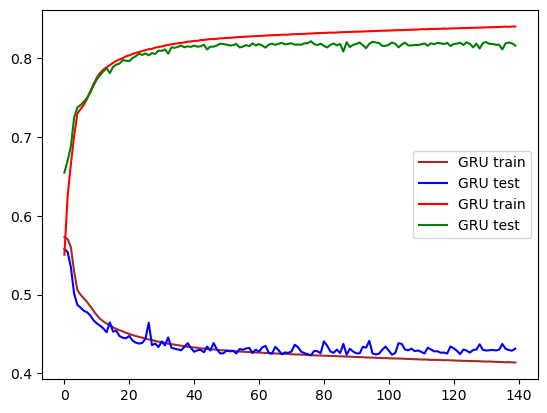

In [72]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.plot(gru_history.history['auc'], label='GRU train', color='red')
plt.plot(gru_history.history['val_auc'], label='GRU test', color='green')
plt.legend()
plt.show()

In [73]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [74]:
np.shape(pred_y)

(95063, 1)

In [75]:
pred_y

array([[0.0005363 ],
       [0.00032476],
       [0.00053547],
       ...,
       [0.02585911],
       [0.02681259],
       [0.02710964]], dtype=float32)

In [77]:
pred_y=np.reshape(pred_y,95063)

0.14376176058630444
0.2269489926911793
0.37915928128730336
0.2727759989558734


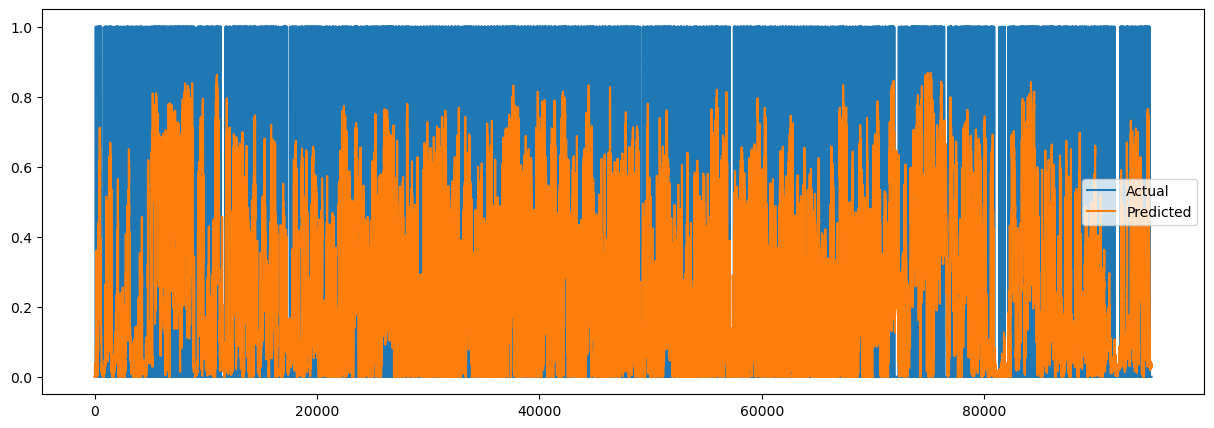

In [78]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [79]:
np.shape(train_X)

(380250, 24, 15)

In [80]:
np.shape(train_y)

(380250, 1)

In [81]:
np.shape(test_X)

(95063, 24, 15)

In [82]:
np.shape(test_y)

(95063, 1)

14854/14854 [==============================] - 845s 57ms/step


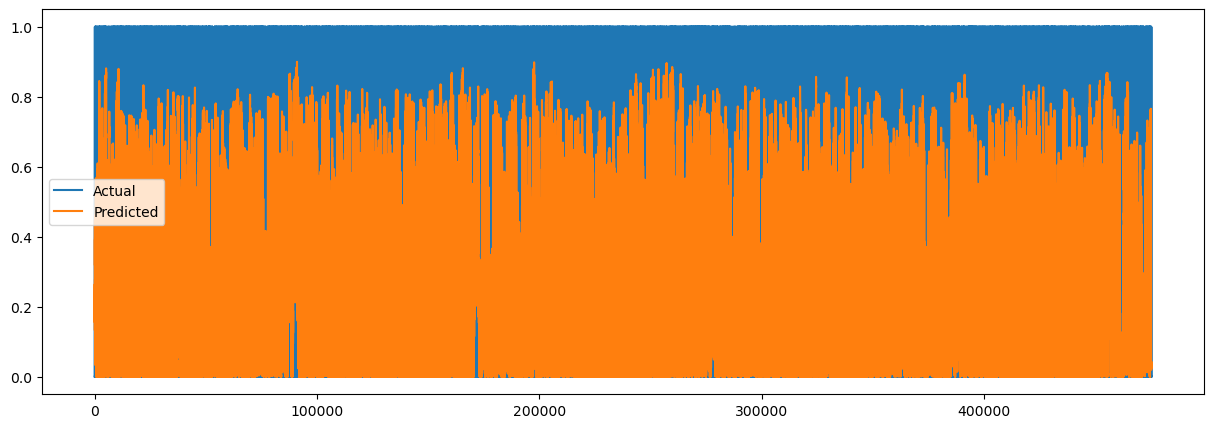

In [83]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

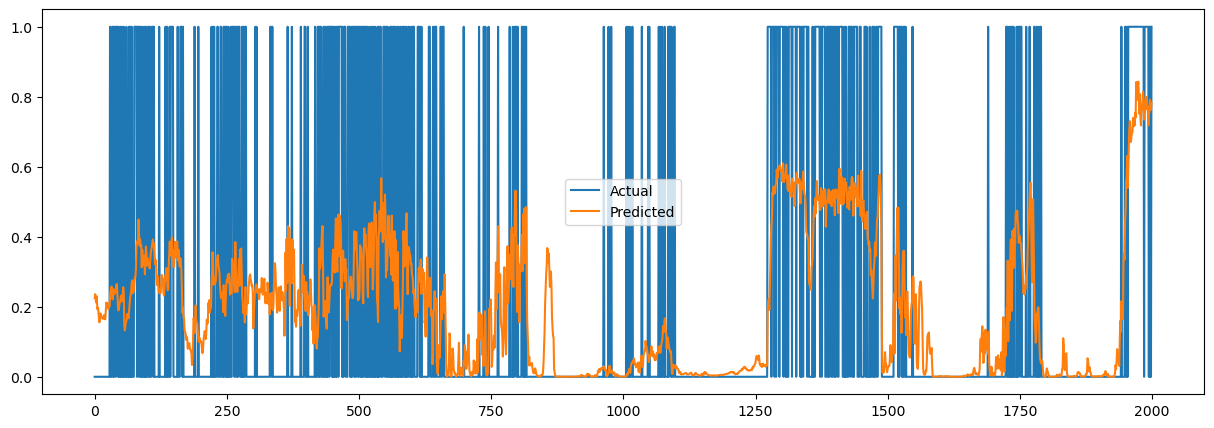

In [84]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [85]:
print(sum(tes)/len(tes))

[0.25795002]


In [86]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.62851442]
[0.82124089]
total acc [0.78730647]


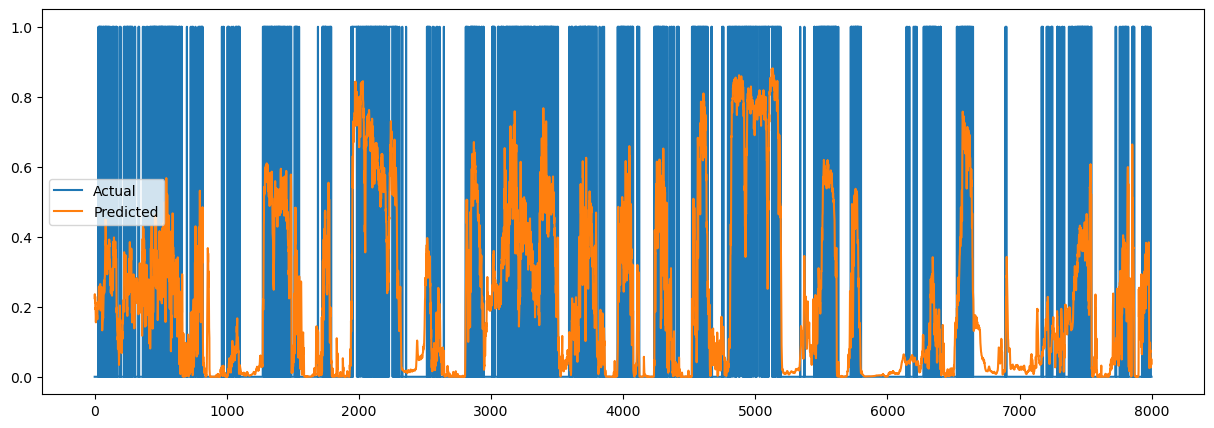

In [87]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

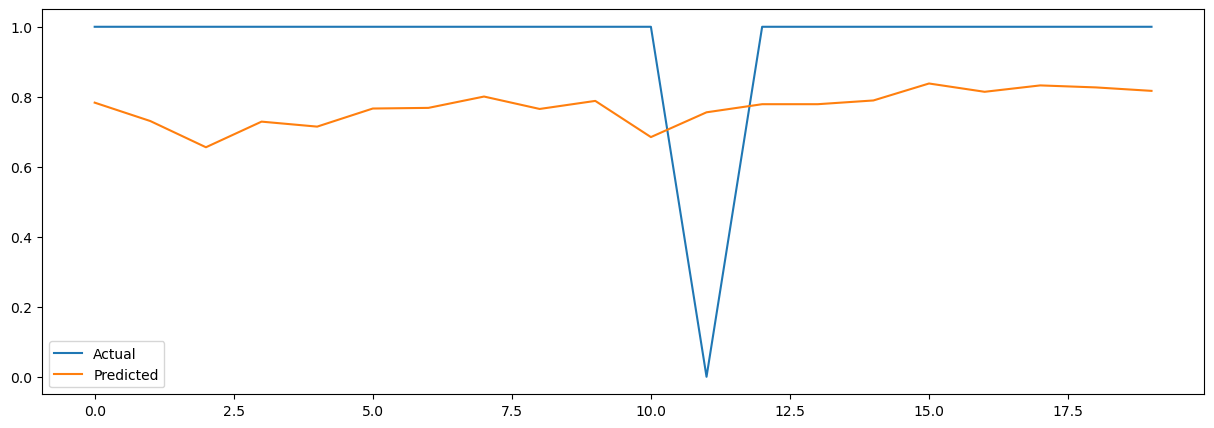

In [88]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

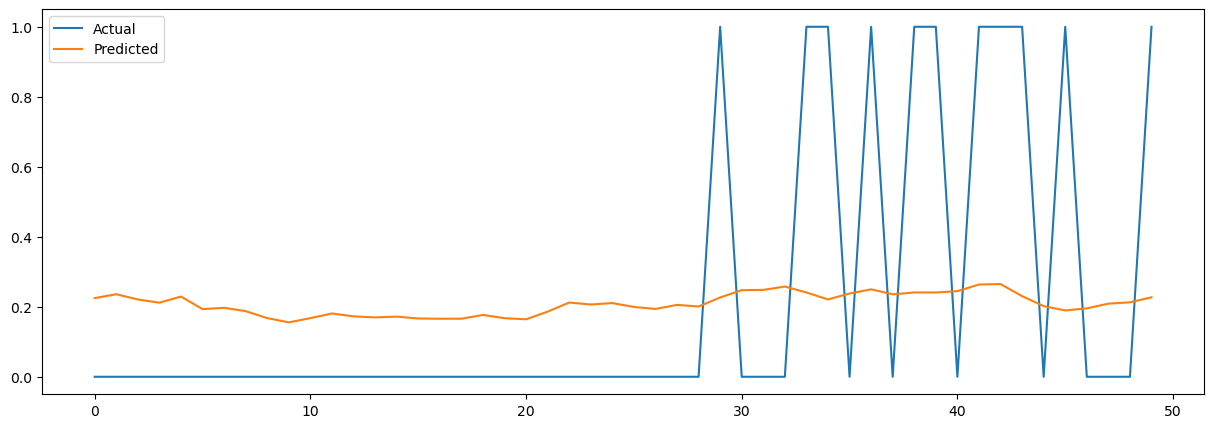

In [89]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

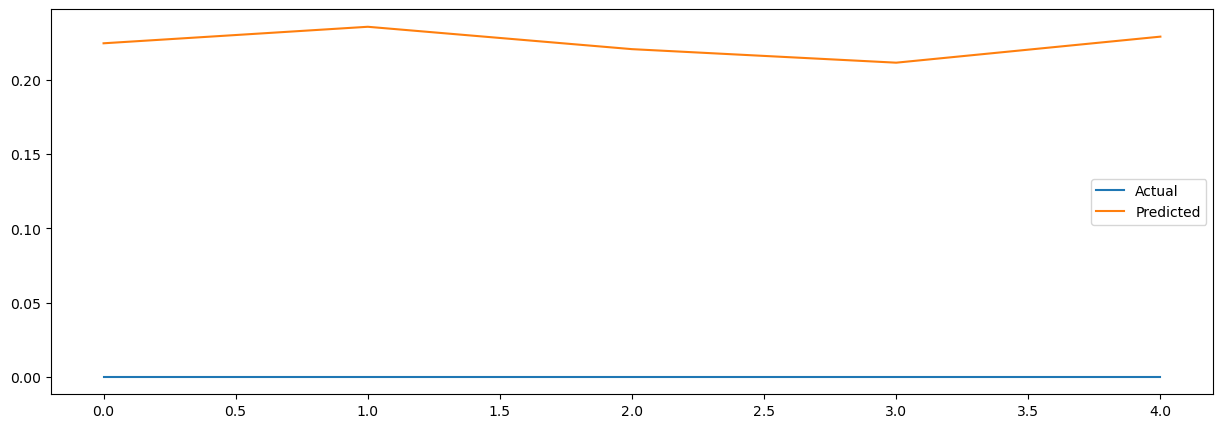

In [90]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()